In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Read the data set
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


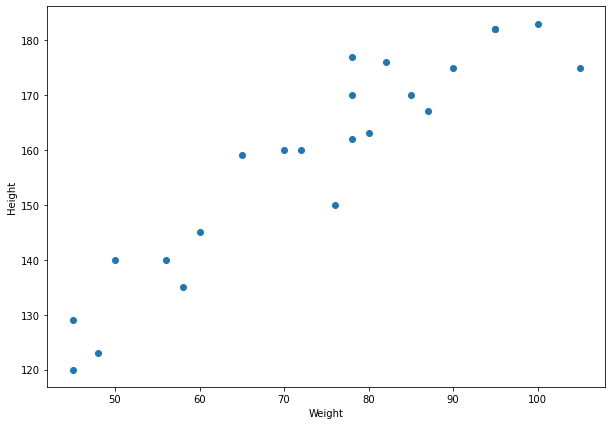

In [4]:
plt.figure(figsize=(10,7))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [5]:
## Divide out data set into independent and dependent feature

x = df[['Weight']]# independent feature
y = df['Height'] # dependent feature

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [8]:
x.shape

(23, 1)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [10]:
## Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit_transform(X_train)

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

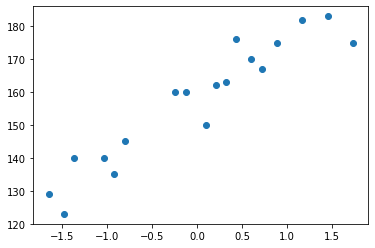

In [14]:
plt.scatter(X_train,y_train)

In [15]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression()

In [17]:
regression.fit(X_train, y_train)

LinearRegression()

In [18]:
print('The slope of coefficient of Weight is ', regression.coef_)
print('The intercept of Weight is ', regression.intercept_)

The slope of coefficient of Weight is  [17.03440872]
The intercept of Weight is  157.5


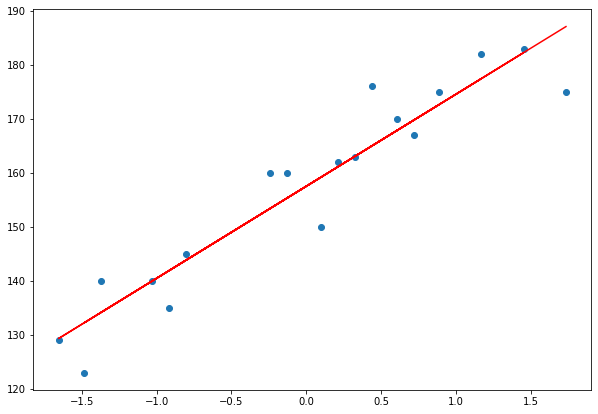

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train)
plt.plot(X_train,regression.predict(X_train),'r')

In [20]:
y_pred_test = regression.predict(X_test)

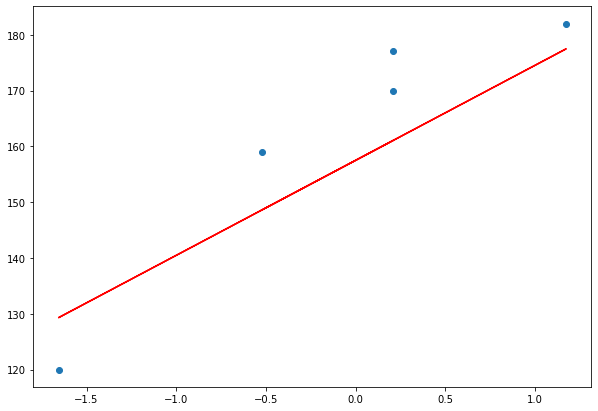

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(X_test, y_test)
plt.plot(X_test,regression.predict(X_test),'r')

## Performance Metrics

#### MSE, MAE, RMSE
#### R square and Adjusted R square

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

In [24]:
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [25]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)

In [26]:
score

0.7769869860423441

In [27]:
## Display  adjusted R squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [29]:
## new data point weight is 80

scaled_weight = scaler.transform([[80]])

c:\Users\Hari\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
scaled_weight

array([[0.32350772]])

In [33]:
print(regression.predict([scaled_weight[0]]))

[163.01076266]
